### Clustering and fitting

In [2]:
# Clustering and fitting Assignment

# Loading Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib.colors import ListedColormap

In [3]:
df = pd.read_csv("wine.csv")               

### Performing basic EDA

In [4]:
df.shape

(178, 13)

In [5]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
df.isnull().sum()                            

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [8]:
df.skew()                                                  # Get Skewness

Alcohol                -0.051482
Malic_Acid              1.039651
Ash                    -0.176699
Ash_Alcanity            0.213047
Magnesium               1.098191
Total_Phenols           0.086639
Flavanoids              0.025344
Nonflavanoid_Phenols    0.450151
Proanthocyanins         0.517137
Color_Intensity         0.868585
Hue                     0.021091
OD280                  -0.307285
Proline                 0.767822
dtype: float64

In [9]:
df.kurt()                                                   # Get Kurtosis

Alcohol                -0.852500
Malic_Acid              0.299207
Ash                     1.143978
Ash_Alcanity            0.487942
Magnesium               2.104991
Total_Phenols          -0.835627
Flavanoids             -0.880382
Nonflavanoid_Phenols   -0.637191
Proanthocyanins         0.554649
Color_Intensity         0.381522
Hue                    -0.344096
OD280                  -1.086435
Proline                -0.248403
dtype: float64

In [10]:
df.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
correlation = df.corr()     
correlation

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


# Heatmap

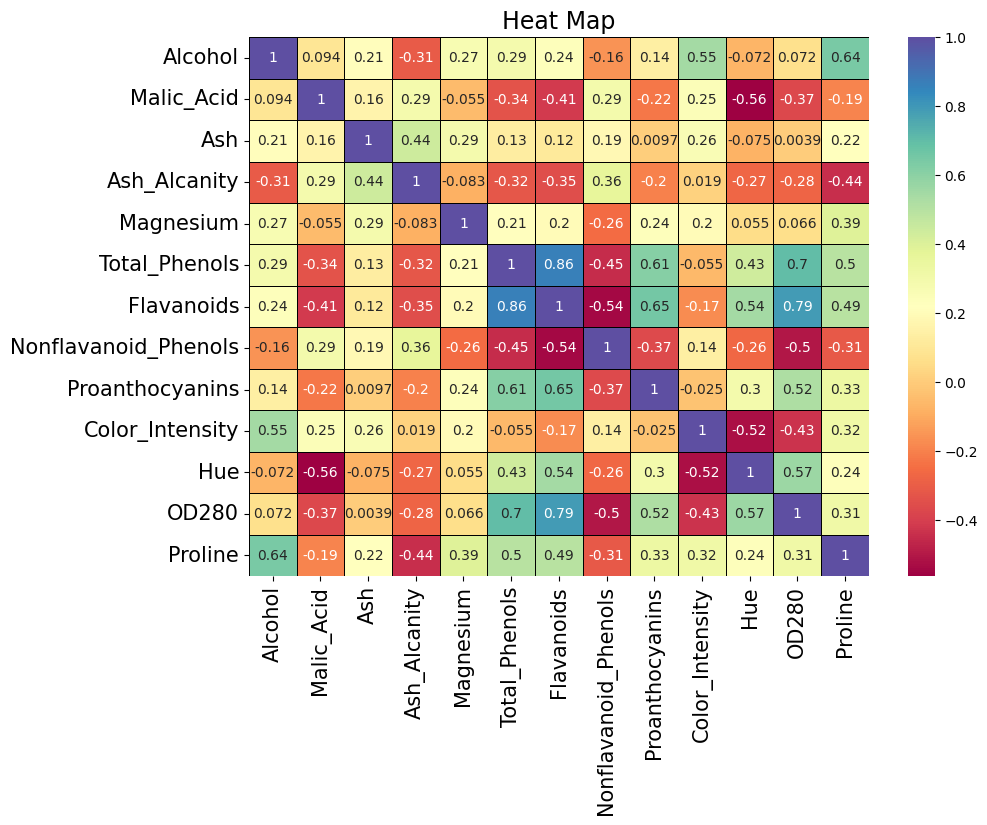

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(correlation, annot = True, cmap = 'Spectral', linecolor = 'black', linewidths=0.4)
plt.xticks(fontsize=15, rotation = 90)
plt.yticks(fontsize=15, rotation = 0)
plt.title('Heat Map',fontsize=17,color='Black')
plt.show()

# Realtional Plot

In [13]:
# Scatter plot function to compare numerical columns

def relation_plot(col1, col2):
    ''' 
    Takes 2 arguments:
    col1 (int) column name 1
    col2 (int) column name 2
        
    Returns Scatter plot
    '''
    plt.figure(dpi = 150)
    sns.scatterplot(df, x = df[col1], y = df[col2], edgecolor = "black", c = "Pink")
    plt.xlabel(col1, size = 10)
    plt.ylabel(col2, size = 10)
    plt.title(f'{col1} vs {col2}')
    plt.xticks()
    plt.yticks()
    plt.grid()

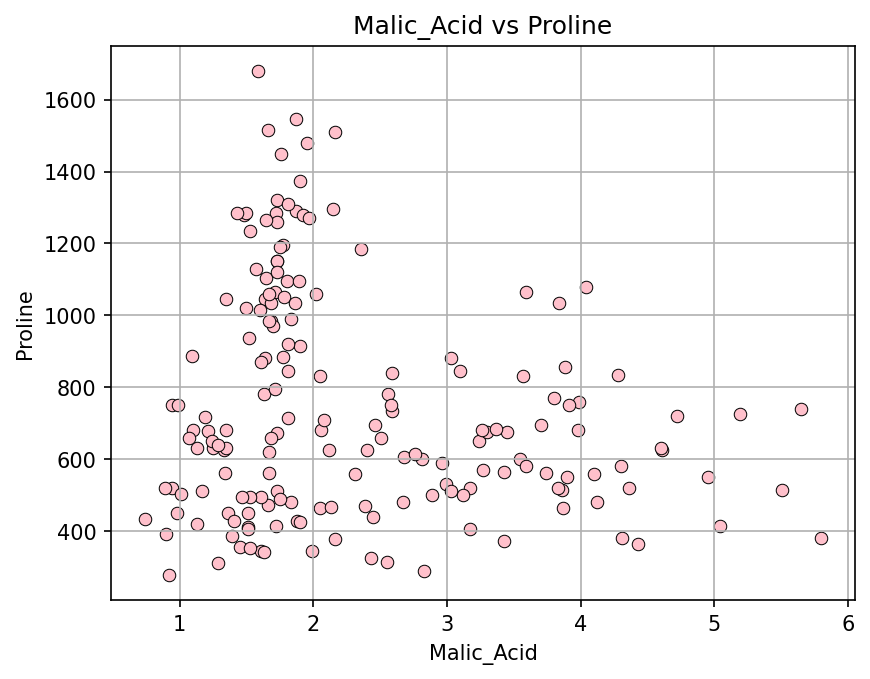

In [14]:
relation_plot("Malic_Acid","Proline")                                     

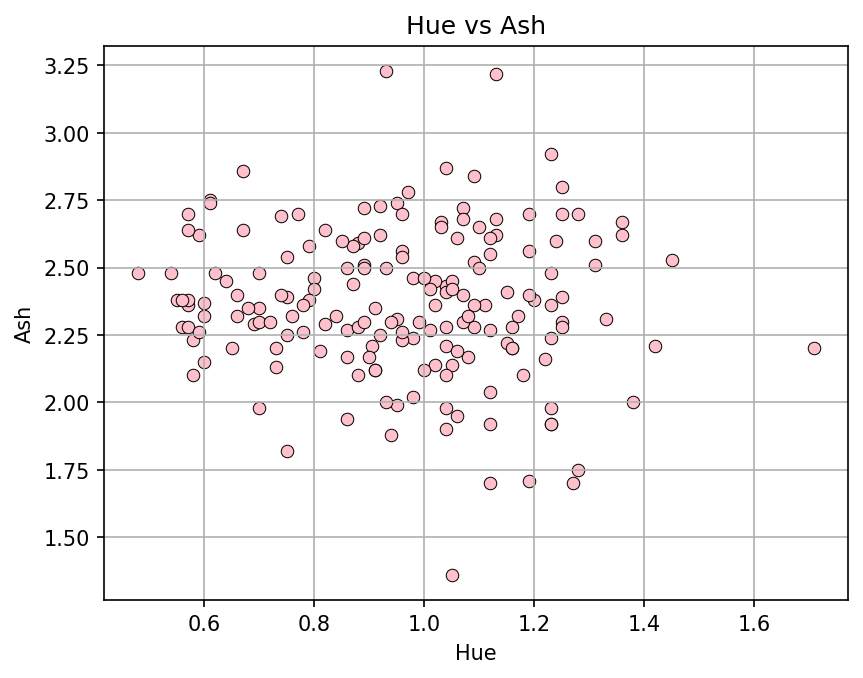

In [15]:
relation_plot("Hue","Ash")  

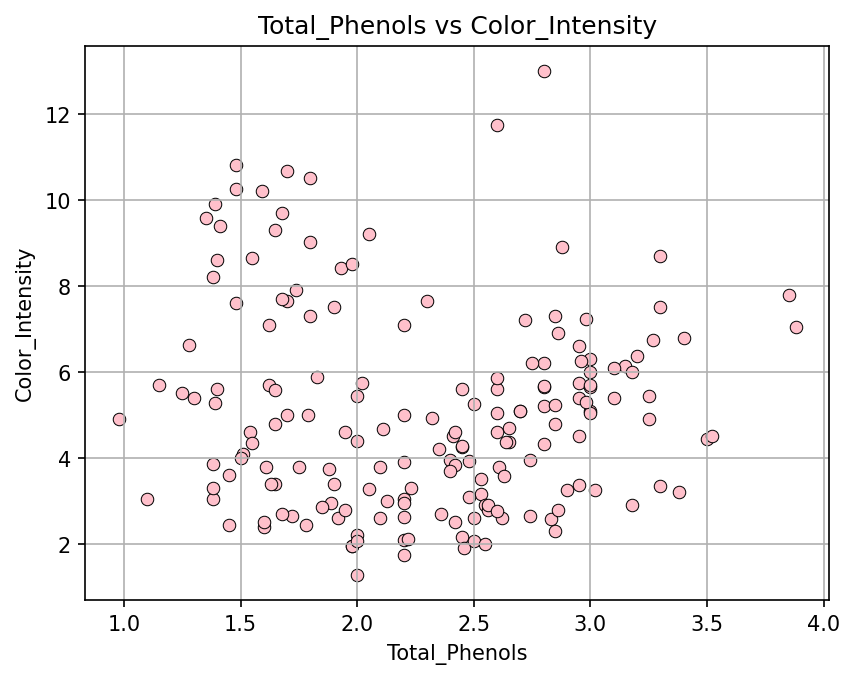

In [16]:
relation_plot("Total_Phenols","Color_Intensity")  

# Categorical Plot

In [17]:
# As there are no categorical columns, converting Alcohol columns to categorical

df["Alcohol_Quantity"] = pd.cut(df["Alcohol"], bins = 4, labels = ["Low", "Medium", "High", "Very High"])

In [18]:
# Boxplot function to compare categorical columns to num

def categorical_plot(col1, col2):
    ''' 
    Takes 2 arguments:
    col1 (str) column name 1
    col2 (int) column name 2
        
    Returns Barplot
    '''
    plt.figure(dpi = 150)
    sns.boxplot(df, x = df[col1], y = df[col2], hue = "Alcohol_Quantity")         
    plt.xlabel(col1, size = 10)
    plt.ylabel(col2, size = 10)
    plt.title(f'{col1} vs {col2}')
    plt.xticks(rotation = 90)
    plt.yticks()
    plt.grid()

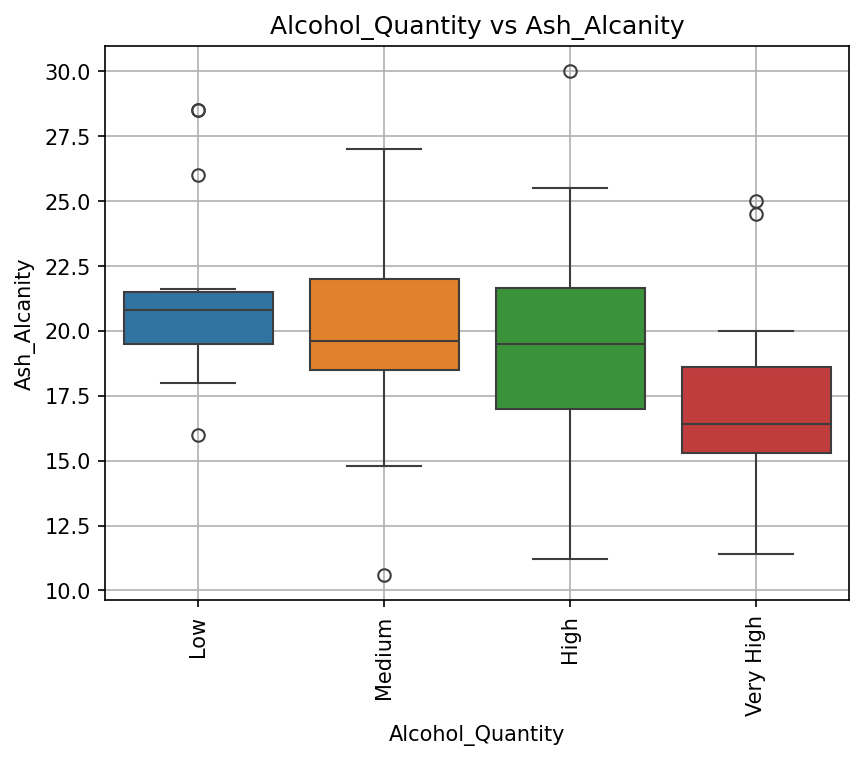

In [19]:
categorical_plot("Alcohol_Quantity", "Ash_Alcanity")                                             

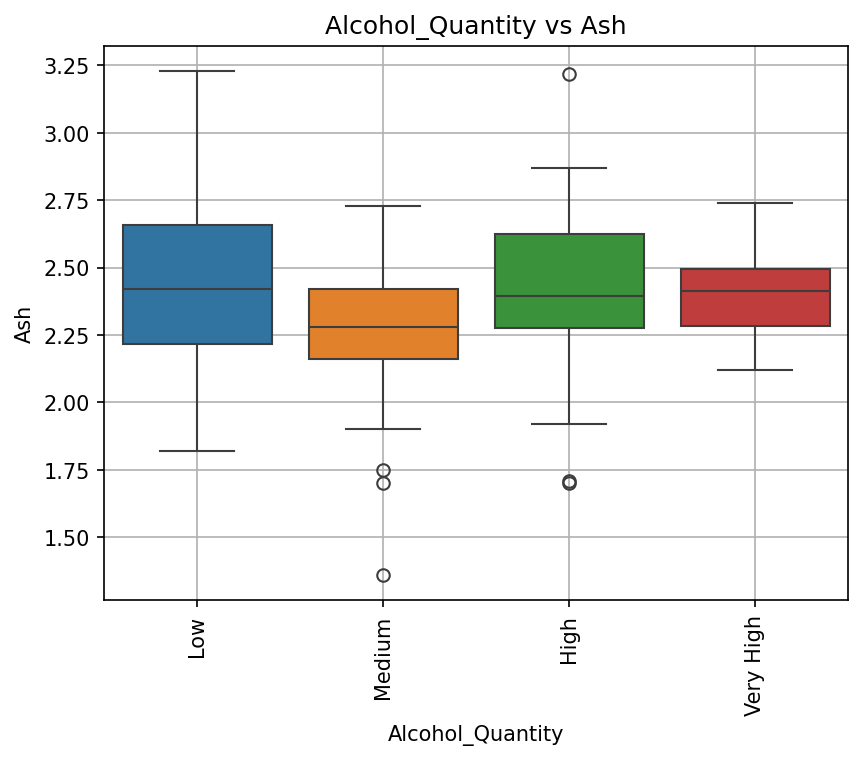

In [20]:
categorical_plot("Alcohol_Quantity", "Ash") 

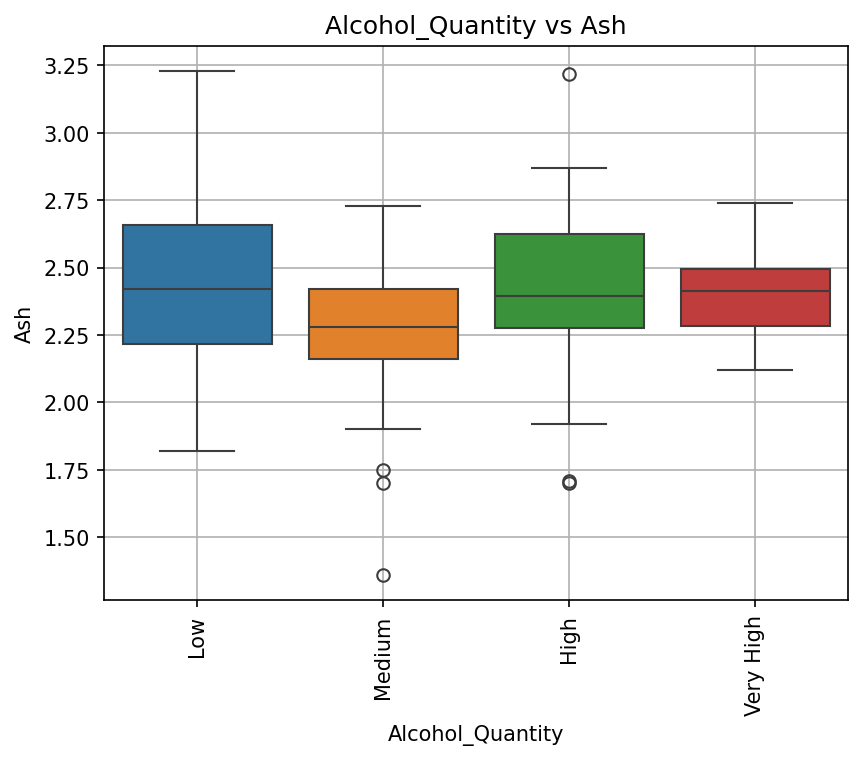

In [21]:
categorical_plot("Alcohol_Quantity", "Ash")

# Stastical Plot

In [22]:
# Statistical function

def statistical_plot(col1):
    ''' 
    Takes 1 argument:
    col1 (int) column name 1

    Returns Histogram
    '''
    plt.figure(figsize = (10,6))
    sns.histplot(df[col1], bins = 30, color = "skyblue", edgecolor = "black", kde = True)
    plt.xlabel(col1, size = 20)
    plt.ylabel("Frequency", size = 20)
    plt.grid()
    plt.title(rf'Distribution of {col1}')

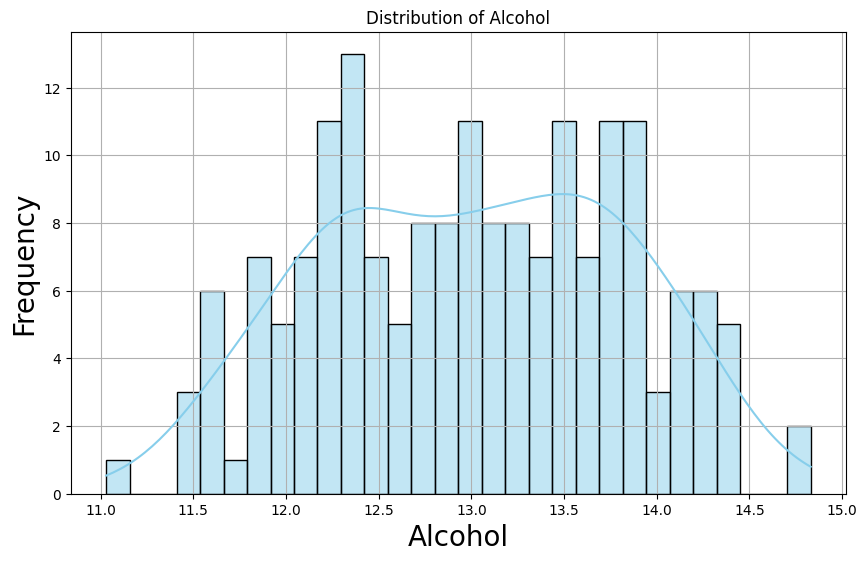

In [23]:
statistical_plot("Alcohol")                                           

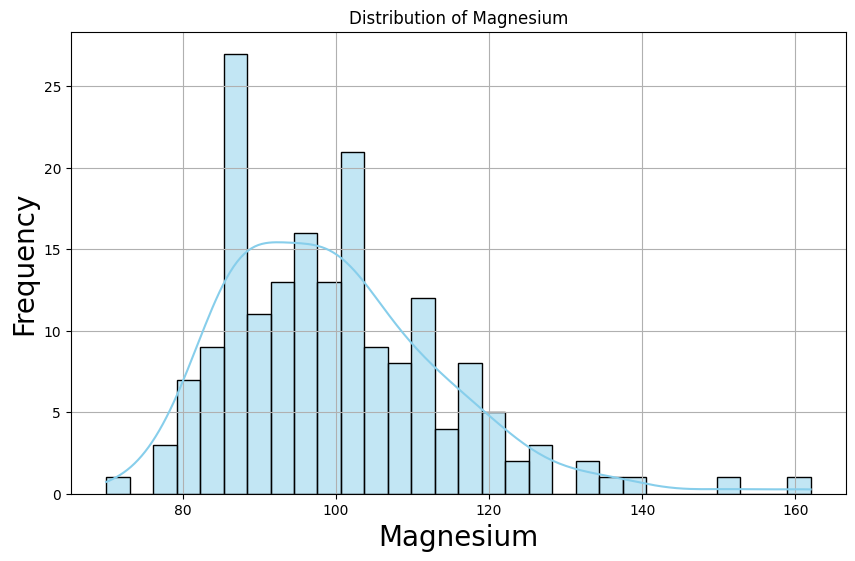

In [24]:
statistical_plot("Magnesium")

# Clustering

<Figure size 1920x1440 with 0 Axes>

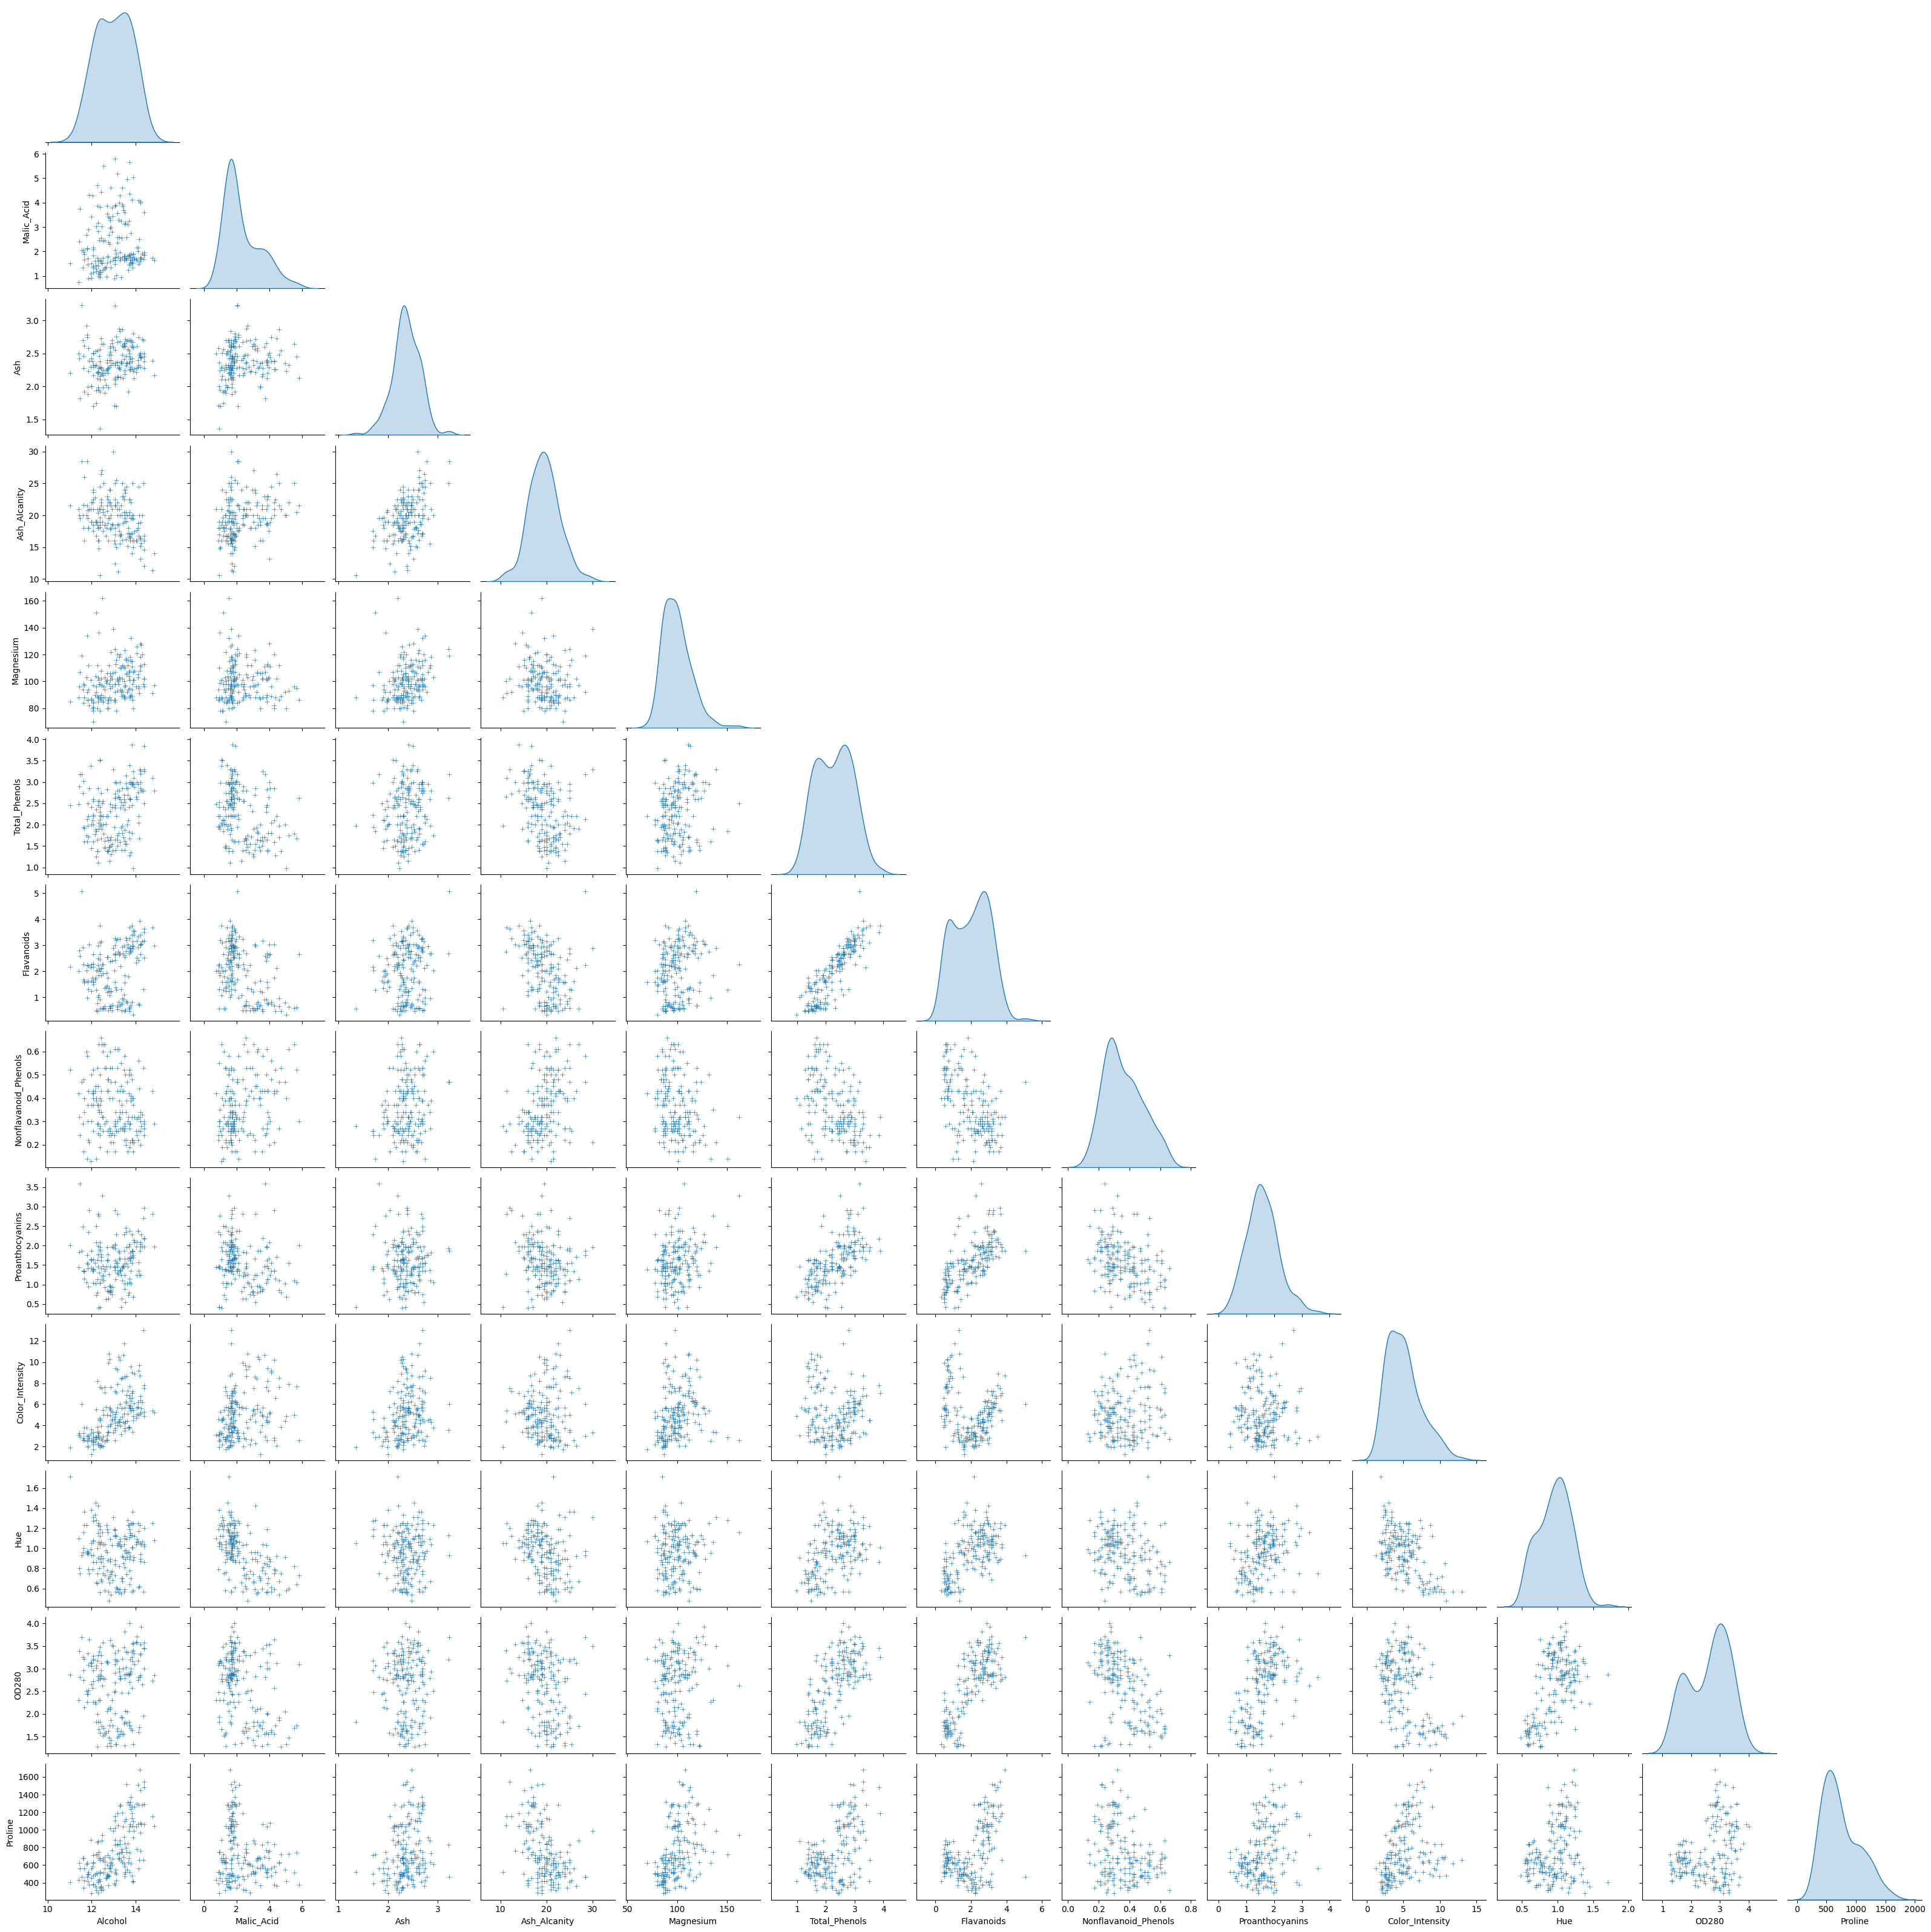

In [25]:
# PairPlot to get columns which are loosely correlated suitable for clustering

plt.figure(dpi = 300)
sns.pairplot(df, diag_kind = 'kde', markers = '+', corner = True)
plt.show()

In [26]:
# Choosing the Columns and scaling the data
# Performed on various columns since entire dataset is suitable for clustering

df_clust = df[["Proline", "Malic_Acid"]].copy()
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df_clust)

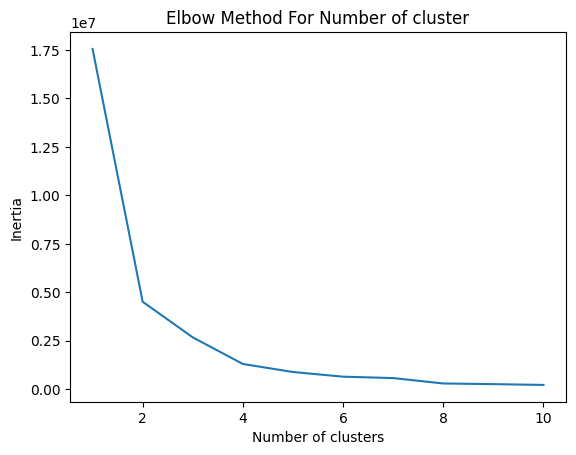

In [27]:
# Applying Elbow method

inertia = []
for i in range(1, 11):
    model = KMeans(n_clusters = i, random_state = 13)
    model.fit(df_clust)
    inertia.append(model.inertia_)
        
plt.plot(range(1, 11), inertia)
plt.title("Elbow Method For Number of cluster")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [28]:
# Silhouette score

best_score = -1
best_k = 2
for k in range(2, 11):
    model = KMeans(n_clusters = k, random_state = 13)
    labels = model.fit_predict(df_clust)
    score = silhouette_score(df_clust, labels)
    if score > best_score:
        best_score = score
        best_k = k

print("The number of cluster recommended is " + str(best_k))

The number of cluster recommended is 2


In [29]:
# Define Clustering Function (Code Borrowed from lecture notes. Credits to Dr. William Cooper)

def Clustering_Function(data, best_k):
    '''
    Input: Dataset and K (get from silhouette/elbow)
    Return labels, xkmeans, ykmeans, cenlabels
    '''
    kmeans = KMeans(n_clusters = best_k, n_init = 20, random_state = 13)
    kmeans.fit(data)
    labels = kmeans.labels_

    # Estimated cluster centres (inverse-scaled for visualization)
    cen = scaler.inverse_transform(kmeans.cluster_centers_)
    xkmeans = cen[:, 0]
    ykmeans = cen[:, 1]
    cenlabels = kmeans.predict(kmeans.cluster_centers_)
    
    return labels, xkmeans, ykmeans, cenlabels

In [30]:
# Define Plotting Function (Code Borrowed from lecture notes. Credits to Dr. William Cooper)

def Clustering_Prediction(labels, xy, xkmeans, ykmeans, centre_labels):
    '''
    Plots clustered data as a scatter plot with determined centres shown
    '''
    colours = plt.cm.Set1(np.linspace(0, 1, len(np.unique(labels))))
    cmap = ListedColormap(colours)
    
    fig, ax = plt.subplots(dpi=144)
    s = ax.scatter(xy[:, 0], xy[:, 1], c = labels, cmap = cmap, marker = 'o', label = 'Data')
    
    ax.scatter(xkmeans, ykmeans, c = centre_labels, cmap = cmap, marker = 'x', s = 100, label = 'Estimated Centres')
    
    cbar = fig.colorbar(s, ax = ax)
    cbar.set_ticks(np.unique(labels))
    ax.legend()
    ax.set_xlabel("Proline")
    ax.set_ylabel("Malic_Acid")
    plt.show()

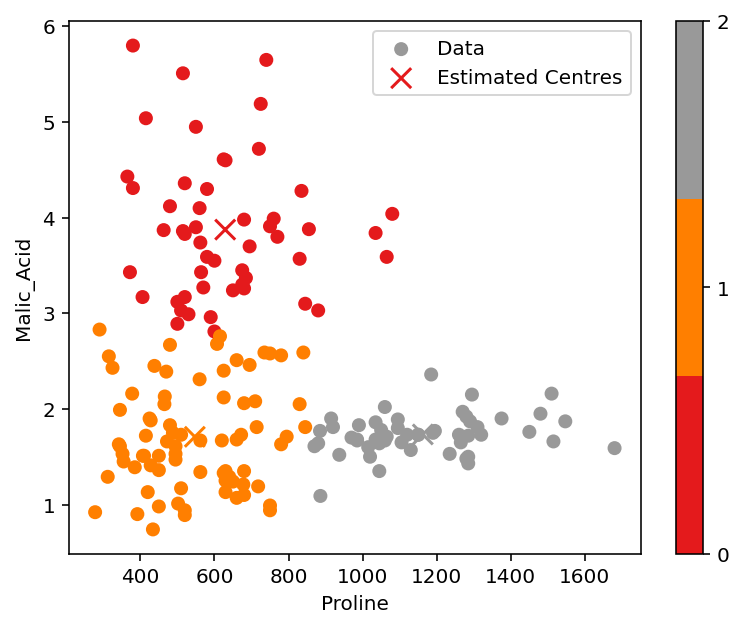

In [31]:
# Run the clustering function
# Performed on diffrent cluster size

labels, xkmeans, ykmeans, cenlabels = Clustering_Function(normalized_data, 3)

# Visualize the results
Clustering_Prediction(labels, df_clust.values, xkmeans, ykmeans, cenlabels)

# Least Square Fitting

In [32]:
# In the dataset, the highest correlation is between Total_Phenols and Flavanoids

In [33]:
from scipy.optimize import curve_fit
from numpy.polynomial import Polynomial as Poly

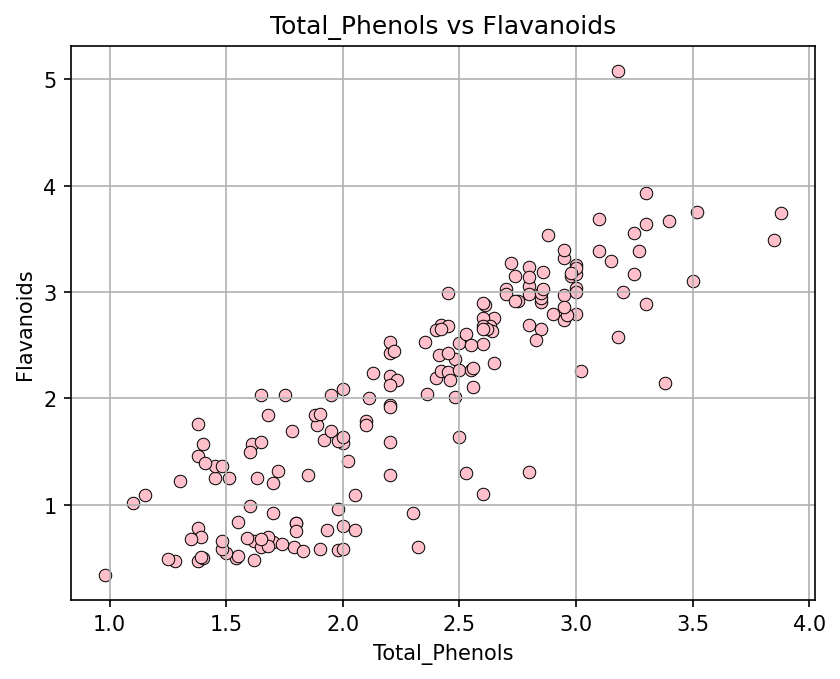

In [38]:
relation_plot("Total_Phenols","Flavanoids") 

In [39]:
# Code Borrowed from lecture notes. Credits to Dr. William Cooper

In [40]:
def linfunc(x, a, b):
    """ Function for fitting a straight line, for curve_fit
        x: independent variable
        a, b: parameters to be fitted
    """
    y = a*x + b
    return y

x = df['Total_Phenols']
y = df['Flavanoids']

In [41]:
# Fit the data using linfunc
p, cov = curve_fit(linfunc, x, y) 

# Extract the uncertainty
sigma = np.sqrt(np.diag(cov))
print(f"a = {p[0]:.2f} +/- {sigma[0]:.2f}")
print(f"b = {p[1]:.2f} +/- {sigma[1]:.2f}")

a = 1.38 +/- 0.06
b = -1.14 +/- 0.14


In [42]:
xline = np.linspace(np.min(x), np.max(x), 100)
yline = linfunc(xline, p[0], p[1])

In [43]:
# Fitting a stright line to data using Poly.fit
p_np = Poly.fit(x, y, 1)

# Calculating covariance matrix
cov = np.polyfit(x, y, 1, cov=True)[1]

# Get uncertainties
sigma_np = np.sqrt(np.diag(cov))

b, a = p_np.convert().coef
print(f"a = {a:.2f} +/- {sigma_np[0]:.2f}")
print(f"b = {b:.2f} +/- {sigma_np[1]:.2f}")

a = 1.38 +/- 0.06
b = -1.14 +/- 0.14


In [44]:
def plot_random_scatter_with_fitted_line(x, y, xline, yline):
    """
    Creates a scatter plot of random x and y data with overplotted line
    """
    plt.figure(dpi=144)
    # scatter plot
    plt.scatter(x, y, color='pink', edgecolor='k', s=50, label='Data points')
    plt.plot(xline, yline, 'k--')
    # make some data for the fitted line, using scipy
    xfit = np.linspace(np.min(x), np.max(x), 100)
    plt.plot(xfit, linfunc(xfit, p[0], p[1]), 'k-') # note the call to the defined function
    # see error margins as f(x) = ax + b
    plt.fill_between(xfit, linfunc(xfit, p[0] - sigma[0], p[1] - sigma[1]),
    linfunc(xfit, p[0] + sigma[0], p[1] + sigma[1]), color='grey', alpha=0.3)
    plt.plot(*p_np.linspace(), 'k-')
    # formatting
    plt.xlabel('Total Phenols (unit)', fontsize=12)
    plt.ylabel('Flavanoids (unit)', fontsize=12)
    plt.title('Scatter Plot with Fitted Line and Error Margins', fontsize=14)
    plt.show()
    return

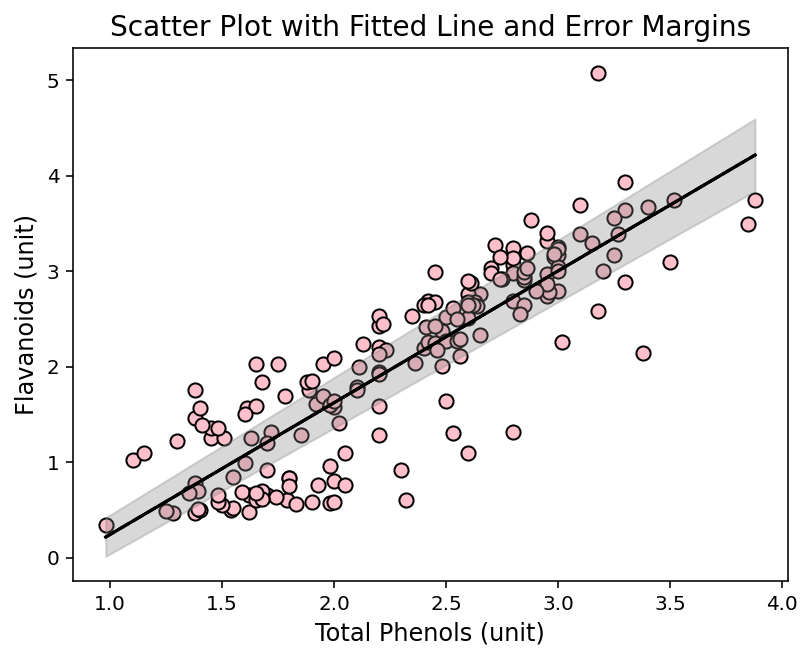

In [45]:
plot_random_scatter_with_fitted_line(x, y, xline, yline)

In [46]:
# End